# Auckland House Price

In [2]:
import json
import sys
sys.path.append('/home/nbuser/library/')

import pandas as pd
import requests

# API Call

In [6]:
def get_pop(lon, lat):
    
    ###returns a panda series of 2018 population according to the latitude and longitude given.###
    
    url = 'https://koordinates.com/services/query/v1/vector.json'

    params = {'key' : '45bec03317ce4b69805c8e13bd8073ad',
              'layer' : '104612',
              'x' : lon,
              'y' : lat
             }

    response = requests.get(url, params = params)
    
    if response.status_code != 200:
        return pd.Series({"2018 Populations": response.status_code})
    
    C18_CurPop = response.json()["vectorQuery"]['layers']['104612']['features'][0]['properties']['C18_CURPop']
    
    return pd.Series({"2018 Population": C18_CurPop})

Calling the API for each property in the csv file and appending to dataframe

In [3]:
df = pd.read_csv("Dataset for Assignment.csv")

In [4]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


In [7]:
df2 = pd.read_excel("otago730395.xlsx")

In [8]:
df2.head()

,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


Applying the function

In [9]:
df["2018 Population"] = df.apply(lambda row:get_pop(row["Longitude"],row["Latitude"]), axis=1)

In [10]:
df.head(10)

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,2018 Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780501,7007917,63,15,24,33,30,39,Mangere Bridge,195
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby,102
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill,162
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa,126
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey,141


In [11]:
df = df.merge(df2,left_on='SA1',right_on='SA12018_code')

Dropping unnecessary columns

In [12]:
df = df.drop(columns = ['NZDep2018_Score',"SA12018_code","URPopnSA1_2018","SA22018_code"])

In [13]:
df = df.drop(columns = ["SA22018_name"])

Changing string type to float type

In [14]:
df["Land area"] = df["Land area"].str.extract('(\d+)').astype(float)
df.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area          float64
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
2018 Population      int64
NZDep2018          float64
dtype: object

Merging data

In [15]:
df = df.merge(df2,left_on="SA1",right_on="SA12018_code")

In [16]:
df = df.drop((["SA12018_code","NZDep2018_y",'NZDep2018_Score','URPopnSA1_2018','SA22018_code','SA22018_name']),axis=1)

Clearing data where there are no data

In [17]:
df=df.dropna()
df.isnull().values.any()

False

In [18]:
df.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area          float64
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
2018 Population      int64
NZDep2018_x        float64
dtype: object

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Analysing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe17e483048>,
      dtype=object)

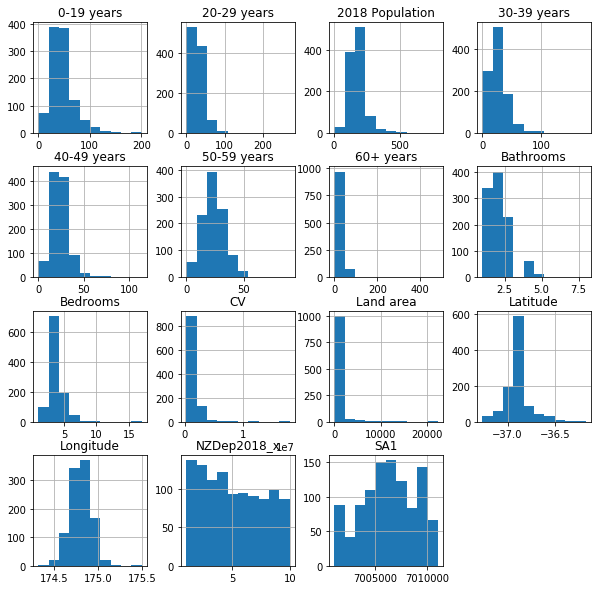

In [20]:
df.hist(figsize=(10,10))

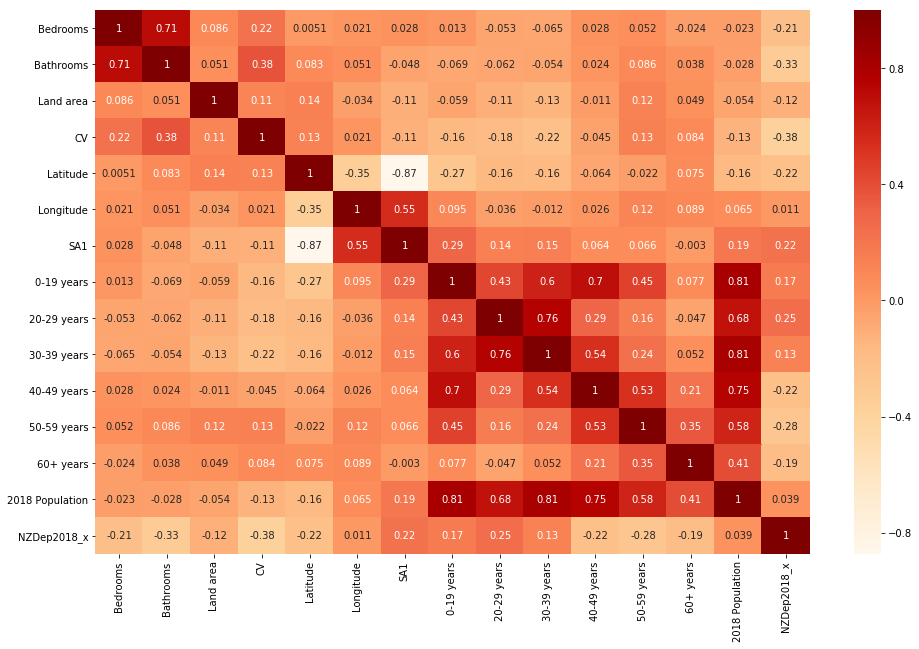

In [22]:
ax,fig = plt.subplots(figsize=(16,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap="OrRd")
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


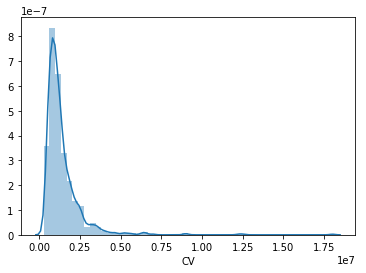

In [23]:
sns.distplot(df["CV"])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Selecting data to analyse

In [55]:
x = df.drop(['NZDep2018_x',"Address","Suburbs"], axis=1)
x.head()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,2018 Population
0,5,3.0,714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,174
1,5,3.0,564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,129
2,6,4.0,626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,129
3,2,1.0,65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,120
4,3,1.0,601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,231


In [56]:
y=df["NZDep2018_x"]
y.head()

0    6.0
1    1.0
2    1.0
3    2.0
4    9.0
Name: NZDep2018_x, dtype: float64

In [68]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [69]:
model = LinearRegression()

In [70]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
model.coef_

array([-1.25411862e-01, -2.88328076e-01, -2.46079493e-05, -6.28725406e-07,
       -6.66446639e-01, -7.28974036e-01,  6.70181540e-05,  4.01242362e-02,
        5.87458260e-03, -3.49659634e-02, -1.50766365e-01, -7.60241393e-02,
       -2.14154236e-02,  2.07069342e-02])

In [72]:
predicted = model.predict(test_x)

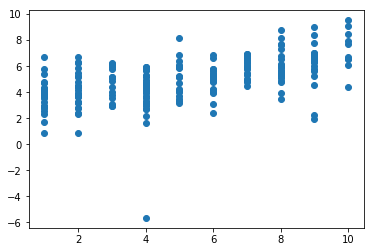

In [73]:
plt.scatter(test_y,predicted)

In [67]:
model.score(test_x,test_y)

0.34216453270151304